# Google Trends about Data Science job


In [3]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
# read information from csv file
pd.set_option('display.max_columns', 22)
df = pd.read_csv("data/ds_job.csv") 
# Lets's look closer to our data
df

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Day,data scientist job: (United States)
2,2020-06-13,19
3,2020-06-14,37
4,2020-06-15,16
...,...,...
87,2020-09-06,0
88,2020-09-07,18
89,2020-09-08,21
90,2020-09-09,16


In [9]:
df = df[2:]
df

,Category: All categories,Unnamed: 1
2,2020-06-13,19
3,2020-06-14,37
4,2020-06-15,16
5,2020-06-16,16
6,2020-06-17,32
...,...,...
87,2020-09-06,0
88,2020-09-07,18
89,2020-09-08,21
90,2020-09-09,16


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 2 to 91
Data columns (total 2 columns):
Category: All categories    90 non-null object
Unnamed: 1                  90 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [12]:
df.rename(columns={'Category: All categories':'date'}, inplace=True)

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [14]:
df.rename(columns={'Unnamed: 1':'count'}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 2 to 91
Data columns (total 2 columns):
date     90 non-null object
count    90 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [17]:
df['date']=pd.to_datetime(df['date'].str.strip(), format='%Y/%m/%d')
df

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,count
2,2020-06-13,19
3,2020-06-14,37
4,2020-06-15,16
5,2020-06-16,16
6,2020-06-17,32
...,...,...
87,2020-09-06,0
88,2020-09-07,18
89,2020-09-08,21
90,2020-09-09,16


In [20]:
df['count']=df['count'].astype(int)
df

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,count
2,2020-06-13,19
3,2020-06-14,37
4,2020-06-15,16
5,2020-06-16,16
6,2020-06-17,32
...,...,...
87,2020-09-06,0
88,2020-09-07,18
89,2020-09-08,21
90,2020-09-09,16


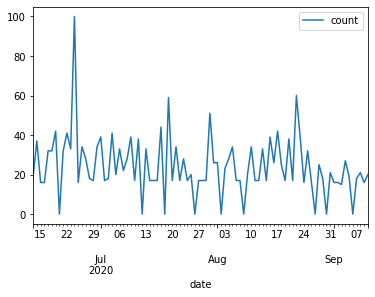

In [21]:
df.plot.line(x='date', y='count')

In [50]:
df['day-of-week'] = df['date'].dt.weekday_name
df['day'] = df['date'].dt.weekday
df

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,count,day-of-week,day
2,2020-06-13,19,Saturday,5
3,2020-06-14,37,Sunday,6
4,2020-06-15,16,Monday,0
5,2020-06-16,16,Tuesday,1
6,2020-06-17,32,Wednesday,2
...,...,...,...,...
87,2020-09-06,0,Sunday,6
88,2020-09-07,18,Monday,0
89,2020-09-08,21,Tuesday,1
90,2020-09-09,16,Wednesday,2


In [56]:
dd = df.sort_values('day').groupby(['day-of-week'])['count'].sum()
dd

day-of-week
Friday       301
Monday       328
Saturday     308
Sunday       251
Thursday     323
Tuesday      312
Wednesday    366
Name: count, dtype: int64

AttributeError: type object 'DataFrame' has no attribute 'sort_value'

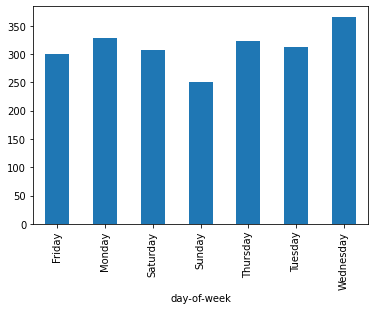

In [49]:
dd.plot.bar(x =['Monday','Tuesday'])